<a href="https://colab.research.google.com/github/dbahiense/MachineLearning/blob/main/1_RPi_0_MachineVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

### What is Machine Learning?

Machine learning means that a computer program improves through experience; it does not need a programmer to alter the program for it to improve. The computer tests a way to complete a task, measures its success, and then changes its approach and tests it again, and again. It always tries to improve on its measurement of success.

While there are lots of different types of machine learning, for now, we will focus on **image classification**: an image is taken and the computer has to recognise which class the supplied image is most likely to belong to (it chooses from a number of ‘classes’ of images the computer has been taught to recognise).

One of the most famous examples of machine learning is to ask whether a picture contains a cat or a dog. The computer can do this because it has been shown thousands of examples of what cats and dogs look like. From these, it builds a **model** — a set of rules for how to decide that an image contains a dog or a cat.

A weakness of image classification is that a program that has been trained only on cats and dogs *always* guesses that something is either a cat or a dog. Image classification programs don’t have the ability to recognise things that were not part of their training, and they likewise can’t decide whether an image contains none of the things they have been trained to recognise.

### What will we make?

We will create a Python function to test a computer’s recognition of an object, then we will supply a photograph of that object and receive the computer’s guess about what it is. This will be a useful tool for us in future projects, so we can test the models we create, and get the results of others’ models when using them as part of an application.

### Using Google Colab

Machine learning needs a lot of data, and a lot of computer processing power. Most personal computers are too slow to train a model, and most internet connections are too slow to download large enough amounts of data to train it with. So, for this project we’re going to use Google Colab. It’s an online tool to write and run machine learning code with the TensorFlow library, which is a collection of machine learning tools created by Google. This lets us use Google’s much more powerful computers, and faster internet connection in so called notebooks.

Notebooks allow us to store text, Python code and the output of that code together. It can be helpful to keep notes to remind ourselves of what our code does at different points or to add notes for other people who may look at our work in future.

In Colab the Python code and text in each notebook is broken up into cells. Each code cell can be run separately, while allowing variables and functions from one cell to be accessed from others. This can be very useful if we need to run a piece of code that takes a long time to run — like to train a machine learning model — but we don’t need to rerun it every time we want to change code that uses the model. However, we’re not going to need to do that in this first project because we need to run all the cells, in order.

We should see spinners appear in the code cells and then see numbers appear in the square brackets to the side of the cells. These numbers indicate the order in which the code was run. This is to make sure that we’re able to run code in our notebook when we need it later.

# Let's start coding

### Import the following necessary libraries

*   **`os`** accesses the operating system, to work with the stored image file
*   **`tensorfolow`** does the actual machine learning and image recognition work
*   **`numpy`** is used to help convert the image into numbers for the model to read
*   **`maplotlib.pyplot`** displays the image in the Colab notebook



In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#### What are software libraries anyway?

A software library is a suite of data and programming code that is used to develop software programs and applications. It is designed to assist both the programmer and the programming language compiler in building and executing software.

A software library generally consists of pre-written code, classes, procedures, scripts, configuration data and more. Typically, a developer might manually add a software library to a program to achieve more functionality or to automate a process without writing code for it. For example, when developing a mathematical program or application, a developer may add a mathematics software library to the program to eliminate the need for writing complex functions. All of the available functions within a software library can just be called/used within the program body without defining them explicitly. Similarly, a compiler might automatically add a related software library to a program on run time.

Source: https://www.techopedia.com/definition/3828/software-library

### Creating a function to get the image

The **`get_image_from_url`** function below takes a URL, fetches the image at it, and stores it in a file.
It then returns the path to the file. This lets us take an image from the internet and turn it into a local file we can give to our model.

It will fail if the image at the URL cannot be read by a machine. Wikipedia images are a good way to avoid this, as is uploading images to our Google Drive.

In [ ]:
def get_image_from_url(image_url):
  # If the temporary test_image.jpg file already exists, 
  # delete it so a new one can be made.
  if os.path.exists('/root/.keras/datasets/test_image.jpg'):
    os.remove('/root/.keras/datasets/test_image.jpg')

  image_path = tf.keras.utils.get_file('test_image.jpg', origin=image_url)
  return image_path

#### What is a function (in programming)?

A function is a unit of code that is often defined by its role within a greater code structure. Specifically, a function contains a unit of code that works on various inputs, many of which are variables, and produces concrete results involving changes to variable values or actual operations based on the inputs.

Source: https://www.techopedia.com/definition/25615/function

### Create another function to print the classification results

The print_classifications function takes a list of predictions, looks up the labels for them, then prints the labels and the weight the model has given to that label. It will save us some work later.

In [ ]:
def print_classifications(classifications):
    for (classification, number) in zip(classifications[0], range(1, len(classifications[0])+1)):
      print('{}. {} {:.2f}%'.format(number, classification[1], classification[2]*100))

### Load the model

We'll now bring in the model we’re going to use from the TensorFlow library. **A model is a set of rules the computer follows to complete a task** — here it’s a set of rules to decide which object appears in an image. This is called **decision classification** and each possible answer, in this case each type of object, is called a class. The model we’ll use is called **VGG16**. VGG16 is a **convolutional network for classification and detection** trained to recognise a wide variety of objects, and it’s very quick to get into our program.

In [ ]:
model = tf.keras.applications.VGG16()

#### Now more about VGG16

https://keras.io/api/applications/vgg/  
https://neurohive.io/en/popular-networks/vgg16/  
https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

### The Classification Function

#### Load the image

Now that we have a model, we need an image to be identified. We have already written the function **`get_image_from_url`** for that. So we just need to include it in a larger function to get our model’s classifications of the image and print them out into the notebook.

#### Prepare the image for use by the model

Notice that, at the same time as we load the image, we tell TensorFlow to resize it to 224 x 224 pixels. That’s because this is the size of image VGG16 was trained to recognise. This does mean that we should try to use images that are close to square.

#### Convert the image to numbers

Now that we can load our model and an image, it’s time to pass the image to the model and see what it thinks it’s looking at.

However, machine learning models can’t actually understand images the way humans do — they need to see everything as numbers. In the case of an image, that means the amount of red, green, and blue light in every pixel of the image. So before we can give the image to our model, we’ll need to convert it into lists of numbers. Luckily, the TensorFlow and NumPy libraries will help us.

#### Use the model to predict the image

Finally, we need to ask our model for a classification based on our image. This uses the **`predict`** method of our model.

So we get our model’s classification of the image and store it in a variable named **`classification_result`**.

Note that, as well as passing the model our image, we also have to tell it that it’s only receiving one image, using the **`batch_size`** parameter. This is because we can ask the model to classify many images at once.

#### Narrowing the results

Now, since we really only care about the few classifications that the model thinks are most likely — it’s probably not confusing an image of a dog with one of a car, for example — the next thing to do is match up the highest of those classification numbers with the labels for each of the categories. Luckily, yet again, there is a TensorFlow function for that!

So we create a variable called **`classifications`**. Then use this rather long TensorFlow function to take **`classification_result`** and get the labels for the top 15 results.

#### Print top classifications

In the end of our **`classify_image`** function we call the **`print_classifications`** function we've already created in the begining of the code.

In [ ]:
def classify_image(image_url):
  # fetch image from the URL
  image_path = get_image_from_url(image_url)

  # prepare image for use by the model
  image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))

  # Create a new figure, or activate an existing figure.
  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
  plt.figure()

  # Display data as an image, i.e., on a 2D regular raster.
  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
  plt.imshow(image)

  # transform image into an array
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.expand_dims(image, axis=0)

  # predicting
  classification_result = model.predict(image, batch_size=1)

  # narrowing results to the top 15
  classifications = tf.keras.applications.imagenet_utils.decode_predictions(classification_result, top=15)

  # print classifications
  print_classifications(classifications)

### Call the classification function

Call the classification function **`classify_image`** with its parameter, i.e., the URL of the image to be classified and that's it: just execute the entire code and...

... be happy!

180224/166544 [================================] - 0s 0us/step
1. timber_wolf 87.57%
2. coyote 7.08%
3. red_wolf 3.25%
4. white_wolf 1.60%
5. dingo 0.12%
6. Eskimo_dog 0.11%
7. dhole 0.11%
8. Siberian_husky 0.10%
9. grey_fox 0.04%
10. malamute 0.02%
11. dogsled 0.01%
12. Norwegian_elkhound 0.00%
13. Arctic_fox 0.00%
14. kelpie 0.00%
15. red_fox 0.00%


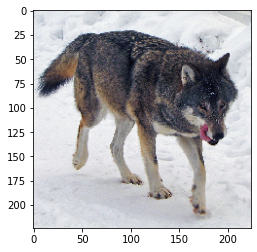

In [ ]:
#classify_image('https://dojo.soy/predict-dog')
classify_image('https://upload.wikimedia.org/wikipedia/commons/5/5f/Kolm%C3%A5rden_Wolf.jpg')

# Source

All explanation texts (some slightly modified by [dbahiense](https://github.com/dbahiense/)) are from https://projects.raspberrypi.org/en/projects/testing-your-computers-vision/0, except where other sources are given.